<a href="https://colab.research.google.com/github/mrcrdg/jupyter_set/blob/master/SVM_Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SVM — Support Vector Machines

The simplest way to interpret the objective function in a SVM is to find the minimum distance of the frontier from the closest support vector. Once we have these distances for all the frontiers, we simply choose the frontier with the maximum distance

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.


To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. 

Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.

A line that is used to classify one class from another is called a hyperplane. Hyperplanes are decision boundaries that help classify the data points.

In [170]:
import pandas as pd
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
data = datasets.load_iris()

In [172]:
#The iris dataset contains measurements for 150 iris flowers from three different species.

#The three classes in the Iris dataset:

#    Iris-setosa (n=50)  = '1'
#    Iris-versicolor (n=50) = '2'
#    Iris-virginica (n=50) = '3'

# The four features of the Iris dataset:

#    sepal length in cm
#    sepal width in cm
#    petal length in cm
#    petal width in cm


In [173]:
iris = pd.DataFrame(data= np.c_[data['data'], data['target']], columns= data['feature_names'] + ['target'])

In [174]:
iris = iris.rename(columns={"sepal length (cm)": "sepal_length", "sepal width (cm)": "sepal_width", "petal length (cm)": "petal_length", "petal width (cm)": "petal_width"})
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


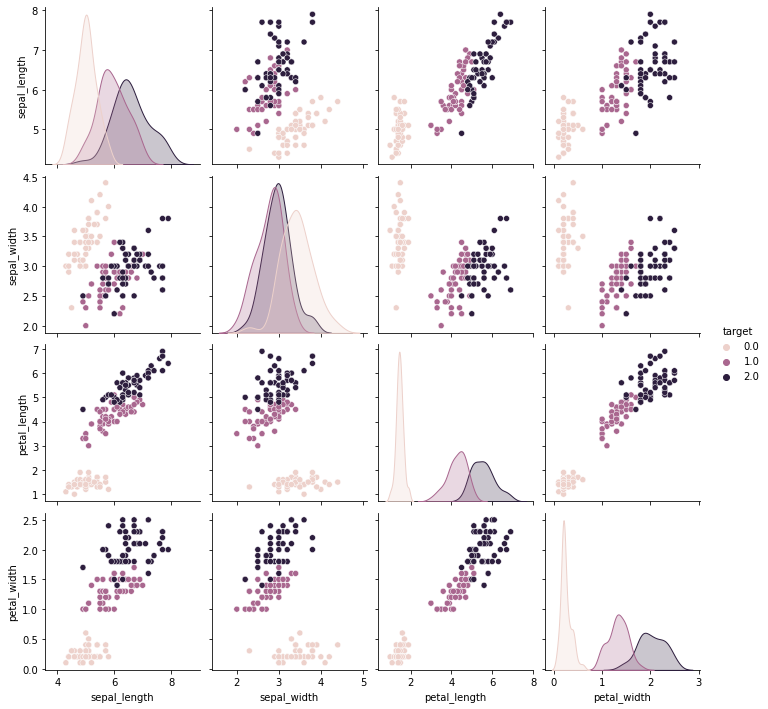

In [175]:
sns.pairplot(iris, hue = 'target');

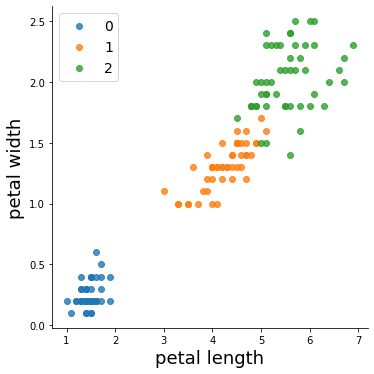

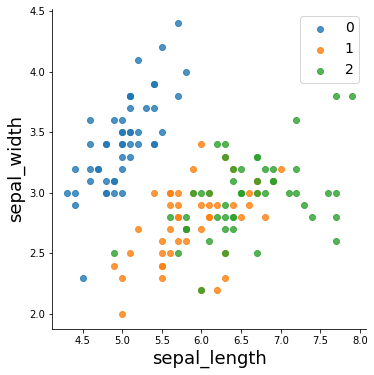

In [176]:
sns.lmplot(x='petal_length',y='petal_width',hue='target',data=iris, fit_reg=False, legend=False)
plt.legend(['0','1', '2'], fontsize = 14)
plt.xlabel('petal length', fontsize = 18)
plt.ylabel('petal width', fontsize = 18)

sns.lmplot(x='sepal_length',y='sepal_width',hue='target',data=iris, fit_reg=False, legend=False)
plt.legend(['0','1', '2'], fontsize = 14)
plt.xlabel('sepal_length', fontsize = 18)
plt.ylabel('sepal_width', fontsize = 18)

plt.show()

## Split Dataset

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0


In [179]:
# Separar variaveis dependentes e independentes
X=iris.iloc[:,:-1]
y=iris.iloc[:,4]

In [180]:
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.25)

In [181]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

112
112
38
38


### SVM Model

In [182]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [183]:
model=SVC()
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [184]:
pred = model.predict(X_test)

#### Evaluation

In [185]:
cm = confusion_matrix(y_test, pred)
print(cm)

accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[ 9  0  0]
 [ 0 15  1]
 [ 0  0 13]]
Accuracy: 95.61 %
Standard Deviation: 5.77 %


In [186]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       1.00      0.94      0.97        16
         2.0       0.93      1.00      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38



## SVM - Linear e RBF Kernel

SVMs using linear kernel have one important parameter that can be tuned, which corresponds to C. C is a hypermeter in SVM to control margin error.
<br>Gamma is used when we use the RBF kernel. Gamma decides that how much curvature we want in a decision boundary. Gamma high means more curvature. Gamma low means less curvature.


In [187]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import pylab as pl
from sklearn import svm, datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


Linear kernel

   C_parameter  Accuracy
0         0.01  0.263158
1         0.10  0.763158
2         1.00  0.763158
3        10.00  0.763158
4       100.00  0.763158

RBF kernel

   Gamma_parameter  Accuracy
0             0.01       0.5
1             0.10  0.763158
2             1.00  0.815789
3            10.00  0.815789
4           100.00  0.736842


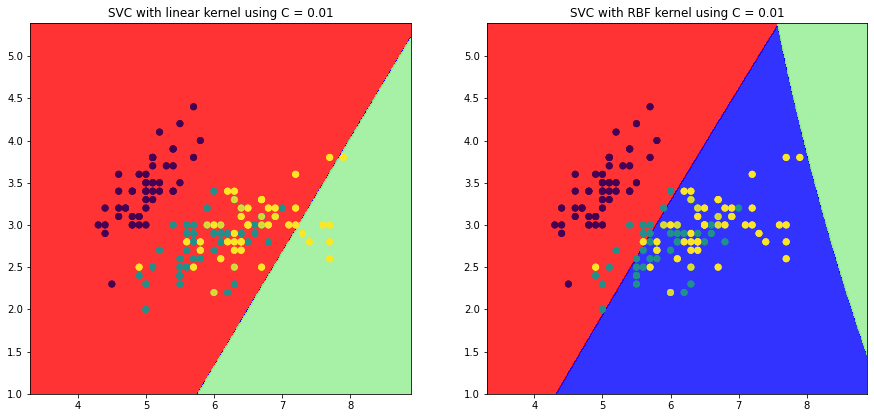

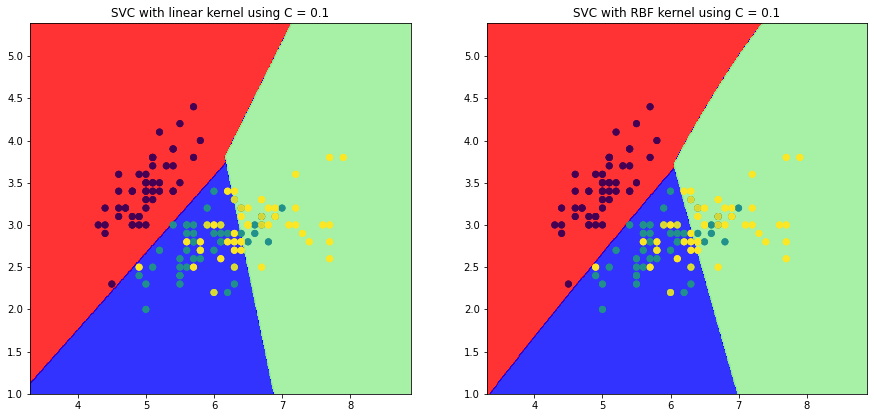

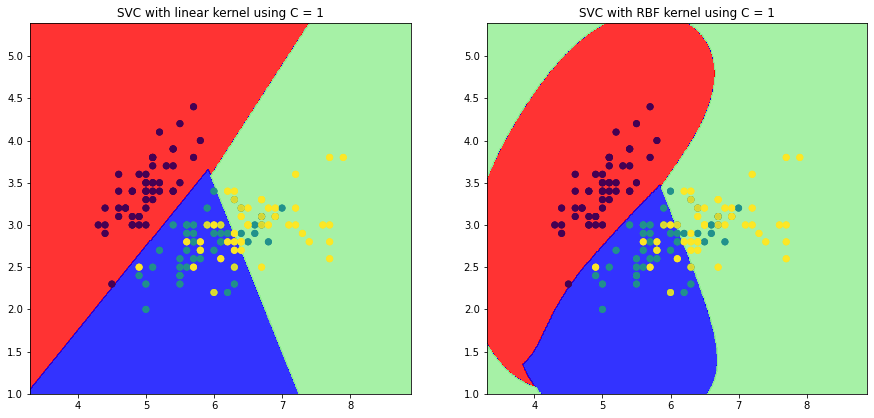

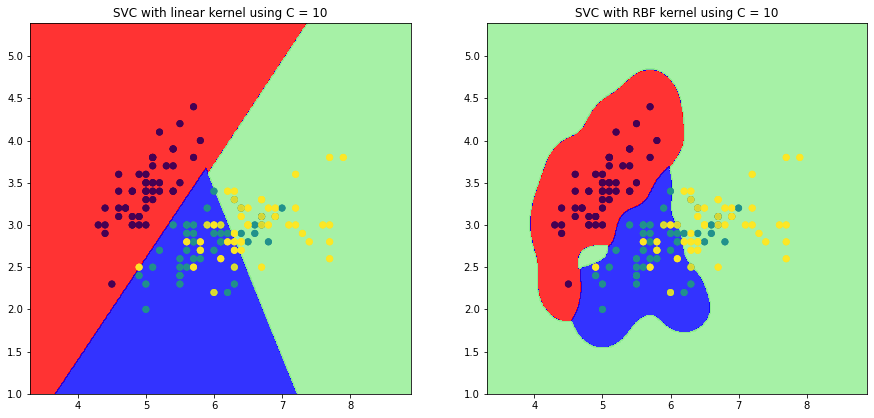

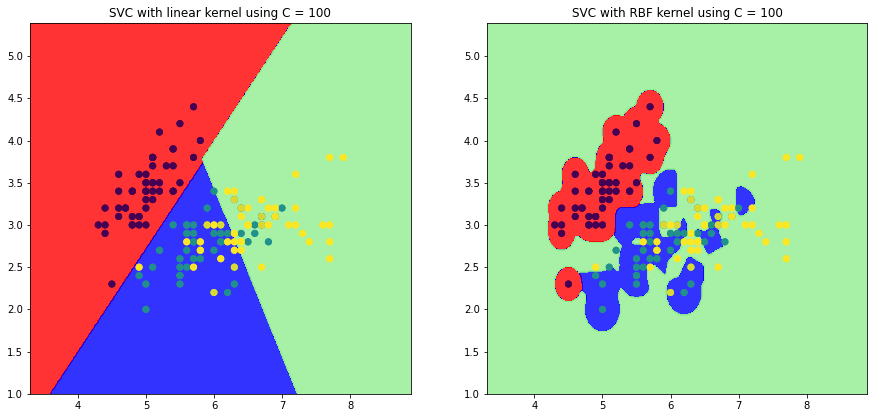

In [188]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # two features: two-dim dataset
y = iris.target

X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.25)

Param_range = [0.01,0.1,1,10,100] # SVM regularization parameter

acc_table_linear = pd.DataFrame(columns = ['C_parameter','Accuracy'])
acc_table_linear['C_parameter'] = Param_range

acc_table_rbf = pd.DataFrame(columns = ['Gamma_parameter','Accuracy'])
acc_table_rbf['Gamma_parameter'] = Param_range

h = .01
j= 0
for C in Param_range:
    
    plt.figure(figsize=(15, 15))

    #Train Model
    svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
    rbf_svc = svm.SVC(kernel='rbf', gamma=C, C=1).fit(X_train, y_train)
    
    # Predict using model
    y_pred_linear = svc.predict(X_test)
    y_pred_rbf = rbf_svc.predict(X_test)
   
    #Acuracia do Modelo
    acc_table_linear.iloc[j,1] = accuracy_score(y_test,y_pred_linear)
    acc_table_rbf.iloc[j,1] = accuracy_score(y_test,y_pred_rbf)
    j += 1

    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # title for the plots
    titles = ['SVC with linear kernel',
              'SVC with RBF kernel']

    for i, clf in enumerate((svc, rbf_svc)):

        plt.subplot(2, 2, i + 1)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.8, cmap = color_Map)
        #plt.axis('off')

        # Plot also the training points
        for idx, cl in enumerate(np.unique(y)):
          plt.scatter(X[:, 0], X[:, 1], c=Y, alpha = 0.8, label = cl)
        
        plt.title(titles[i] + ' using C = %s'%C)

print('\nLinear kernel\n')
print(acc_table_linear)
print('\nRBF kernel\n')
print(acc_table_rbf)
plt.show()

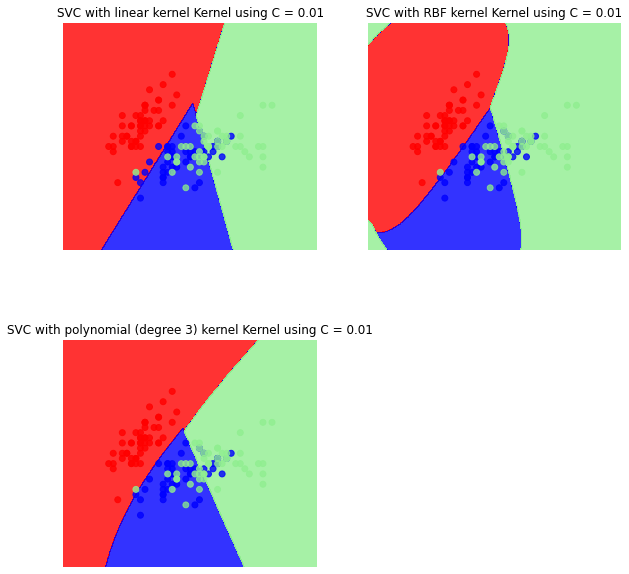

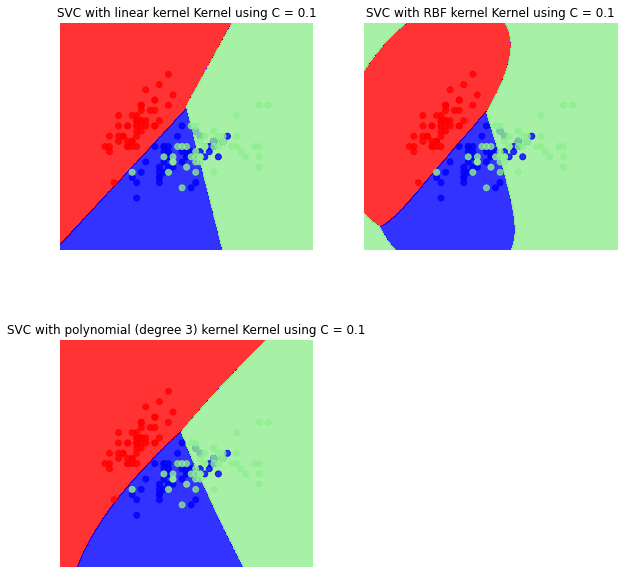

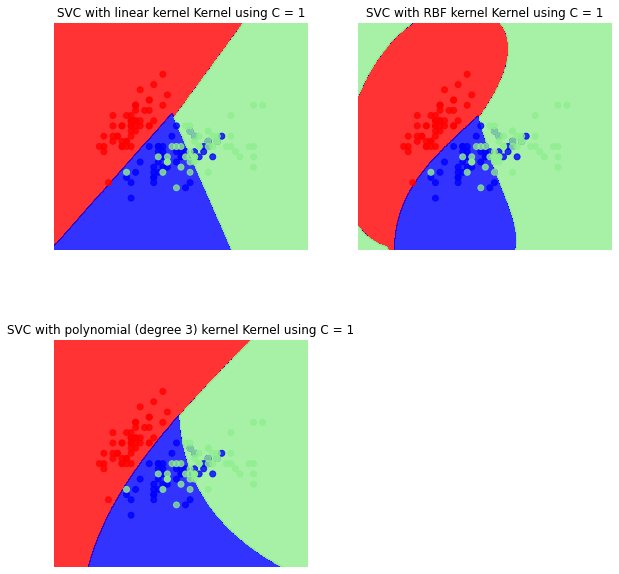

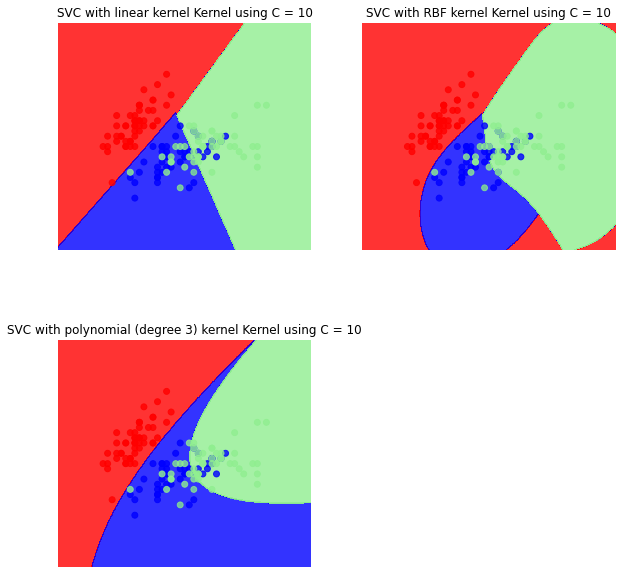

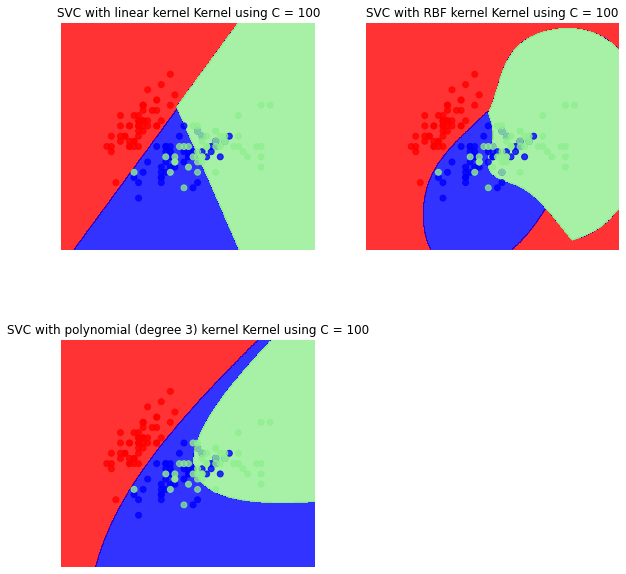

In [189]:

# import some data to play with
#iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .01  # step size in the mesh


markers = ('s','x','o','^','v')
#colors = ('red','blue','lightgreen','gray','cyan')
color_Map = ListedColormap(colors[:len(np.unique(y))])

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C_param_range = [0.01,0.1,1,10,100] # SVM regularization parameter


for C in C_param_range:
    
    plt.figure(figsize=(10, 10))

    svc = svm.SVC(kernel='linear', C=C).fit(X, y)
    rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
    poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)

    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

    # title for the plots
    titles = ['SVC with linear kernel',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel']


    for i, clf in enumerate((svc, rbf_svc, poly_svc)):
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        pl.subplot(2, 2, i + 1)
        plt.subplots_adjust(hspace = 0.4)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        pl.contourf(xx, yy, Z, alpha=0.8,cmap = color_Map)
        pl.axis('off')

        # Plot also the training points
        pl.scatter(X[:, 0], X[:, 1], c=Y, alpha=0.8,cmap = color_Map)
        
        pl.title(titles[i] + ' Kernel using C = %s'%C)

    pl.show()